<a href="https://colab.research.google.com/github/dfiorellino/Ana-Pred/blob/main/ana_pred_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from math import *

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
base =pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Prueba_final.csv',sep=',')

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            19158 non-null  int64  
 1   city_development_index                19158 non-null  float64
 2   relevent_experience                   19158 non-null  int64  
 3   education_level                       19158 non-null  int64  
 4   experience                            19158 non-null  int64  
 5   last_new_job                          19158 non-null  int64  
 6   training_hours                        19158 non-null  int64  
 7   target                                19158 non-null  int64  
 8   high_major_discipline                 19158 non-null  int64  
 9   company_size_high_company_size        19158 non-null  int64  
 10  company_size_low_company_size         19158 non-null  int64  
 11  company_type_hi

In [5]:
base.head()

,Unnamed: 0,city_development_index,relevent_experience,education_level,experience,last_new_job,training_hours,target,high_major_discipline,company_size_high_company_size,company_size_low_company_size,company_type_high_company_type,company_type_low_company_type,gender_Female,gender_Male,gender_Other,city,enrolled_university_Full time course,enrolled_university_no_enrollment
0,1,0.920,1,3,21,1,36,1,1,1,0,1,0,0,1,0,103,0,1
1,2,0.776,0,3,15,5,47,0,1,0,1,0,1,0,1,0,40,0,1
2,3,0.624,0,3,5,0,83,0,1,1,0,1,0,0,0,0,21,1,0
3,4,0.789,0,3,0,0,52,1,1,1,0,0,1,0,0,0,115,0,1
4,5,0.767,1,4,21,4,8,0,1,0,1,0,1,0,1,0,162,0,1


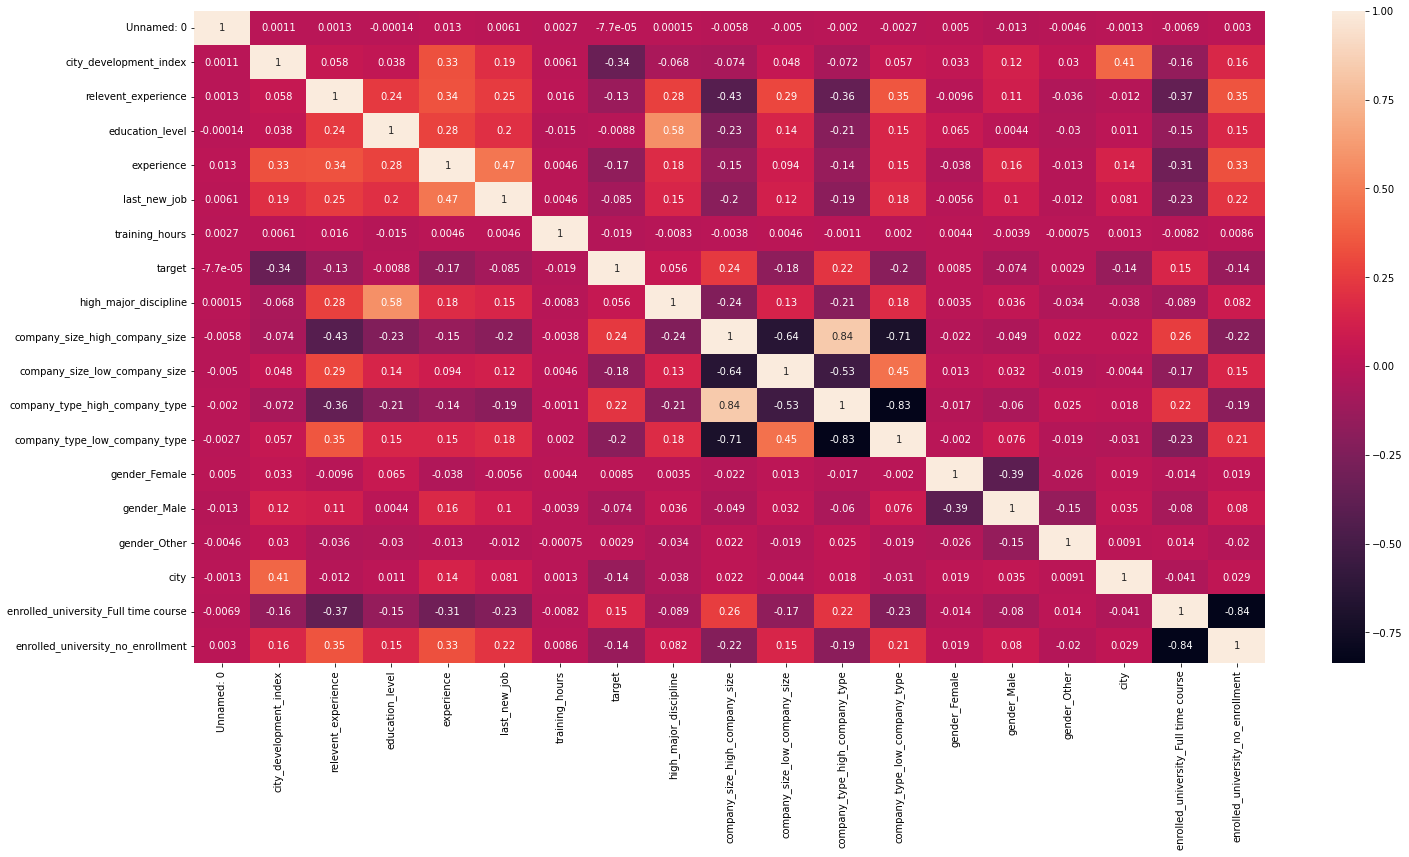

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(24,12))
sns.heatmap(base.corr(), annot = True)

In [338]:
y_base =base['target']

x_base =base[['city_development_index','relevent_experience','education_level', 'experience','last_new_job', 'training_hours', 'high_major_discipline', 'company_size_high_company_size', 'company_size_low_company_size','company_type_low_company_type','company_type_high_company_type', 'enrolled_university_Full time course','enrolled_university_no_enrollment','city']]

BALANCEO DE CLASES

In [339]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27)
x_base, y_base = sm.fit_resample(x_base, y_base)

In [247]:
y_base.value_counts()

1    14381
0    14381
Name: target, dtype: int64

In [248]:
x_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28762 entries, 0 to 28761
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   city_development_index                28762 non-null  float64
 1   relevent_experience                   28762 non-null  int64  
 2   education_level                       28762 non-null  int64  
 3   experience                            28762 non-null  int64  
 4   last_new_job                          28762 non-null  int64  
 5   training_hours                        28762 non-null  int64  
 6   high_major_discipline                 28762 non-null  int64  
 7   company_size_high_company_size        28762 non-null  int64  
 8   company_size_low_company_size         28762 non-null  int64  
 9   company_type_low_company_type         28762 non-null  int64  
 10  company_type_high_company_type        28762 non-null  int64  
 11  enrolled_univer

PARTICIONO LA BASE (70-30)

In [341]:
from sklearn.model_selection import train_test_split   # testing and splitting 
x_train, x_test, y_train,y_test = train_test_split(x_base,y_base,test_size = 0.3,random_state = 0 )

In [346]:
print("Length of Training Data: {}".format(len(x_train)))
print("Length of Testing Data: {}".format(len(x_test)))

Length of Training Data: 20133
Length of Testing Data: 8629


REGRESION 

In [251]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=42)
classifier_logreg.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [369]:
y_pred = classifier_logreg.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [253]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.7457411055742265


Confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


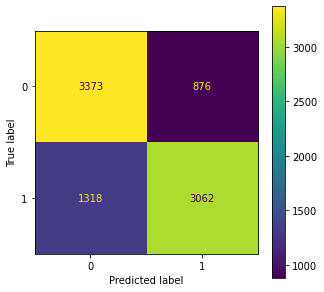

In [254]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_logreg, x_test,y_test)

Curva ROC

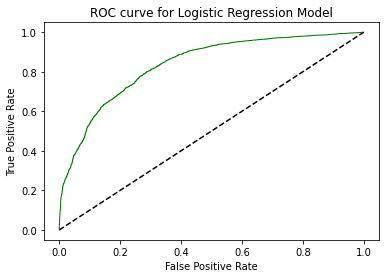

In [255]:
y_pred_logreg_proba = classifier_logreg.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [381]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, classifier_logreg.decision_function(x_test))

0.8362048926903026

Cross Validation

In [256]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.7486963  0.73975664 0.74596474 0.73944362 0.7568306 ]
Average cross-validation score: 0.7461383796482537


In [257]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.73783515 0.7611718  0.74975174 0.73174367 0.73671138 0.75310482
 0.73323398 0.74465971 0.76751118 0.74366617]
Average cross-validation score: 0.7459389588331258


RANDOM FOREST

In [314]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(max_depth=18, random_state= 42)

In [315]:
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=18, random_state=42)

In [316]:
random_forest_model.score(x_test, y_test)

0.8346274191679222

In [317]:
random_forest_model.score(x_train, y_train)

0.9583767943177868

In [307]:
fila5 = []

for i in range(14,29,2):
  print(i)
  rf = RandomForestClassifier(max_depth=i)
  rf.fit(x_train,y_train)
  r2_train = rf.score(x_train, y_train)
  r2_test = rf.score(x_test, y_test)
  fila5.append([i,r2_train,r2_test])

14
16
18
20
22
24
26
28


In [308]:
scores_prof = pd.DataFrame(fila5, columns=["max_depth","r2_train","r2_test"])
scores_prof

,max_depth,r2_train,r2_test
0,14,0.905330,0.832657
1,16,0.932698,0.834280
2,18,0.958973,0.839495
3,20,0.976010,0.835786
4,22,0.986043,0.836713
5,24,0.992748,0.836018
6,26,0.995679,0.836598
7,28,0.997069,0.835207


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


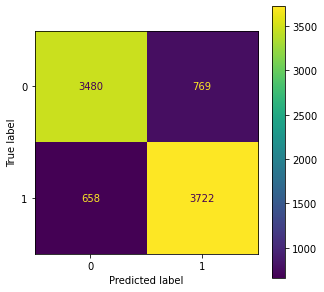

In [318]:
plot_confusion_matrix(random_forest_model, x_test,y_test)

Descision trees


In [68]:
from sklearn.tree import DecisionTreeClassifier

In [349]:
dtree =DecisionTreeClassifier(max_depth=10)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [350]:
dtree.score(x_test, y_test)

0.8069301193649322

In [351]:
dtree.score(x_train, y_train)

0.8469676650275667

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


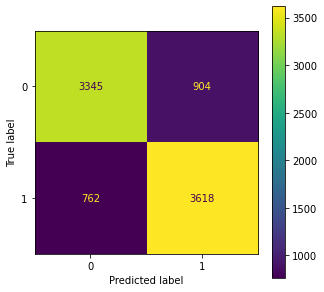

In [352]:
plot_confusion_matrix(dtree, x_test,y_test)

EXTRA TREES

In [279]:
from sklearn.ensemble import ExtraTreesClassifier
Extra_T = ExtraTreesClassifier(max_depth = 20, n_estimators=150, random_state=42)
Extra_T.fit(x_train, y_train)

ExtraTreesClassifier(max_depth=20, n_estimators=150, random_state=42)

In [280]:
Extra_T.score(x_test,y_test)

0.8328890949125043

In [281]:
Extra_T.score(x_train,y_train)

0.9670689912084637

In [271]:
fila = []

for i in range(14,25,2):
  print(i)
  et = ExtraTreesClassifier(max_depth=i)
  et.fit(x_train,y_train)
  r2_train = et.score(x_train, y_train)
  r2_test = et.score(x_test, y_test)
  fila.append([i,r2_train,r2_test])

14
16
18
20
22
24


In [273]:
scores_depth = pd.DataFrame(fila, columns=["max_depth","r2_train","r2_test"])
scores_depth

,max_depth,r2_train,r2_test
0,14,0.885710,0.824893
1,16,0.916754,0.828369
2,18,0.946406,0.832426
3,20,0.967615,0.834512
4,22,0.981076,0.832541
5,24,0.987881,0.828254


In [277]:
fila2 = []

for i in range(150,181,5):
  et2 = ExtraTreesClassifier(max_depth=20,n_estimators=i,random_state=42)
  et2.fit(x_train,y_train)
  r2_train = et2.score(x_train, y_train)
  r2_test = et2.score(x_test, y_test)
  fila2.append([i,r2_train,r2_test])

In [276]:
scores_n_estimators = pd.DataFrame(fila2, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators

,n_estimators,r2_train,r2_test
0,120,0.967069,0.832078
1,125,0.967069,0.832773
2,130,0.967069,0.832310
3,135,0.967019,0.831614
4,140,0.967417,0.832310
5,145,0.967218,0.831846


In [278]:
scores_n_estimators = pd.DataFrame(fila2, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators

,n_estimators,r2_train,r2_test
0,150,0.967069,0.832889
1,155,0.967119,0.832426
2,160,0.967119,0.832541
3,165,0.967268,0.832541
4,170,0.967019,0.832541
5,175,0.967069,0.831614
6,180,0.967119,0.832426


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


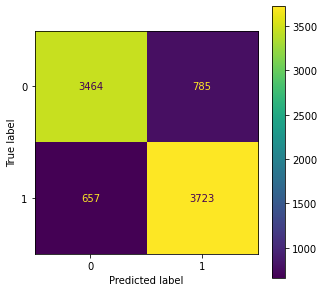

In [282]:
plot_confusion_matrix(Extra_T, x_test,y_test)

XG BOOST

In [382]:
import xgboost as xgb
XGboost = xgb.XGBClassifier(max_depth = 26, n_estimators = 105, colsample_bytree = 0.3)
XGboost.fit(x_train,y_train)

XGBClassifier(colsample_bytree=0.3, max_depth=26, n_estimators=105)

In [383]:
XGboost.score(x_test,y_test)

0.8444779232819561

0.8414648279058987 CON company high type
0.8407694982037316 SIN (le saco company type y size y baja - csi agrego gender baja - si saco educ_level baja)

In [330]:
XGboost.score(x_train,y_train)

0.9308597824467293

In [286]:
fila3 = []

for i in range(14,29,2):
  xb = xgb.XGBClassifier(max_depth=i)
  xb.fit(x_train,y_train)
  r2_train = xb.score(x_train, y_train)
  r2_test = xb.score(x_test, y_test)
  fila3.append([i,r2_train,r2_test])

In [287]:
scores_depth_xb = pd.DataFrame(fila3, columns=["max_depth","r2_train","r2_test"])
scores_depth_xb

,max_depth,r2_train,r2_test
0,14,0.965579,0.840074
1,16,0.976953,0.840074
2,18,0.984553,0.839611
3,20,0.988973,0.840306
4,22,0.991258,0.842044
5,24,0.993344,0.840885
6,26,0.994636,0.843087
7,28,0.995281,0.840885


In [292]:
fila4 = []

for i in range(95,106,5):
  xb = xgb.XGBClassifier(max_depth=26, n_estimators=i)
  xb.fit(x_train,y_train)
  r2_train = xb.score(x_train, y_train)
  r2_test = xb.score(x_test, y_test)
  fila4.append([i,r2_train,r2_test])

In [291]:
scores_n_estimators2 = pd.DataFrame(fila4, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators2

,n_estimators,r2_train,r2_test
0,110,0.995579,0.843435
1,115,0.995778,0.842624
2,120,0.995877,0.841697
3,125,0.996175,0.842160
4,130,0.996473,0.841117


In [293]:
scores_n_estimators2 = pd.DataFrame(fila4, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators2

,n_estimators,r2_train,r2_test
0,95,0.994387,0.842855
1,100,0.994636,0.843087
2,105,0.995381,0.843667


In [303]:
from sklearn.metrics import mean_squared_error
import numpy as np

preds = XGboost.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.395390


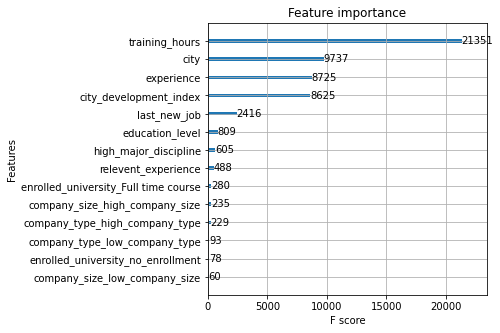

In [331]:
xgb.plot_importance(XGboost)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


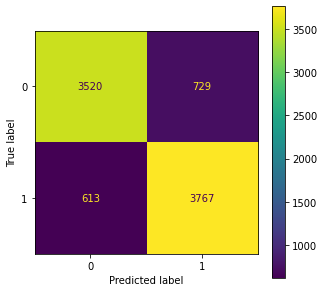

In [332]:
plot_confusion_matrix(XGboost, x_test,y_test)

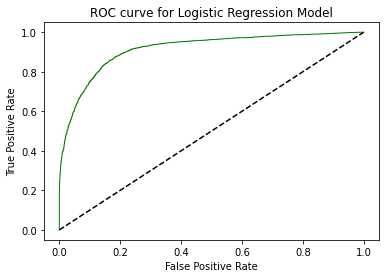

In [385]:
y_pred_xb_proba = XGboost.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xb_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [388]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, XGboost.predict_proba(x_test)[:,1]) 

0.9143779465702917

SVM

In [166]:
from sklearn import svm
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(x_train, y_train)

SVC(kernel='linear')

In [168]:
svm_clf.score(x_test,y_test)

0.7480588712481168

In [169]:
svm_clf.score(x_train,y_train)

0.7465852083643769

In [377]:
from sklearn import metrics

Ypred = svm_clf.predict(x_test)

print("Precision:",metrics.precision_score(y_test, Ypred))
print("Recall:",metrics.recall_score(y_test, Ypred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Precision: 0.762200956937799
Recall: 0.7273972602739726


**Precision** nos da la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?
**Recall** nos da la cantidad: ¿qué porcentaje de la clase positiva hemos sido capaces de identificar?
**F1** combina Precision y Recall en una sola medida

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


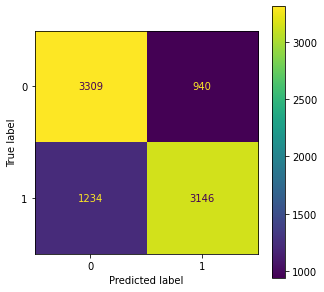

In [172]:
plot_confusion_matrix(svm_clf, x_test,y_test)

RED NEURONAL

In [364]:
from sklearn.neural_network import MLPClassifier
clf_red = MLPClassifier(hidden_layer_sizes=(7,), random_state=42)
clf_red.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(7,), random_state=42)

In [365]:
clf_red.score(x_test,y_test)

0.78943098852706

In [366]:
clf_red.score(x_train,y_train)

0.7840858292355833

In [362]:
fila7 = []

for i in range(5,22,2):
  red = MLPClassifier(hidden_layer_sizes=(i,), random_state=42)
  red.fit(x_train,y_train)
  r2_train = red.score(x_train, y_train)
  r2_test = red.score(x_test, y_test)
  fila7.append([i,r2_train,r2_test])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [363]:
scores_layers = pd.DataFrame(fila7, columns=["capas ocultas","r2_train","r2_test"])
scores_layers

,capas ocultas,r2_train,r2_test
0,5,0.745492,0.741453
1,7,0.784086,0.789431
2,9,0.765410,0.770889
3,11,0.780410,0.782709
4,13,0.769731,0.766601
5,15,0.769533,0.774018
6,17,0.776139,0.771005
7,19,0.785874,0.783405
8,21,0.775493,0.774366


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


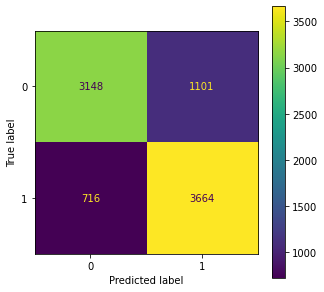

In [367]:
plot_confusion_matrix(clf_red, x_test,y_test)

In [368]:
red_pred = clf_red.predict(x_test)

print("Precision:",metrics.precision_score(y_test, red_pred))
print("Recall:",metrics.recall_score(y_test, red_pred))

Precision: 0.7689401888772298
Recall: 0.8365296803652968
